In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame

import matplotlib.pyplot as plt
# Magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
#read data in-1
df = pd.read_csv("final.csv")

In [3]:
df = DataFrame(df, columns=['Reviews','Rating','Price','Revenue','Cuisine','NIL','lat','lng','restaurants_count','Population','Pricexm2'])

In [4]:
df['Revenue'] = df['Price'] * df['Reviews']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reviews            2169 non-null   float64
 1   Rating             2265 non-null   float64
 2   Price              996 non-null    float64
 3   Revenue            930 non-null    float64
 4   Cuisine            2265 non-null   object 
 5   NIL                2265 non-null   object 
 6   lat                2265 non-null   float64
 7   lng                2265 non-null   float64
 8   restaurants_count  2265 non-null   int64  
 9   Population         2265 non-null   int64  
 10  Pricexm2           2265 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 194.8+ KB


In [6]:
df.head()

,Reviews,Rating,Price,Revenue,Cuisine,NIL,lat,lng,restaurants_count,Population,Pricexm2
0,368.0,5.0,8.0,2944.0,"Filipino, Healthy",BRERA,45.47940,9.18209,114,18492,6250
1,236.0,5.0,NaN,NaN,"Middle Eastern, Turkish, Pub, Bar, Internation...",XXII MARZO,45.46201,9.21903,89,31720,4100
2,174.0,5.0,53.5,9309.0,"Italian, Steakhouse, Barbecue",FORZE ARMATE,45.46848,9.12568,8,24871,1700
3,168.0,5.0,9.5,1596.0,"Italian, Street Food, Fast Food",DUOMO,45.46162,9.19556,204,16765,4950
4,665.0,5.0,11.5,7647.5,"Italian, Mediterranean, Deli, Street Food, Apu...",PORTA VIGENTINA - PORTA LODOVICA,45.45179,9.18687,44,13686,3300


**Handling missing data**

In [7]:
# Impute categorical variables with the most frequent,
# because this method is better for replace null values of categorical variables 
imp_obj= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols]= pd.DataFrame(data=imp_obj.fit_transform(df[obj_cols]),
                                         index=df[obj_cols].index, columns=obj_cols)
df[obj_cols].isnull().sum().sum()

0

In [8]:
# Impute numeric values with mean
# because this method has better result than imputation with median
imp_num= SimpleImputer(missing_values=np.nan, strategy='mean')
num_cols = df.drop(columns=['Reviews']).select_dtypes(include=['float64', 'int64']).columns
df[num_cols]= pd.DataFrame(data=imp_num.fit_transform(df[num_cols]),
                                         index=df[num_cols].index, columns=num_cols)
df[num_cols].isnull().sum().sum()

0

In [9]:
# Deleting rows with missing outcomes
df = df.dropna()

**Encode categorical features**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2264
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reviews            2169 non-null   float64
 1   Rating             2169 non-null   float64
 2   Price              2169 non-null   float64
 3   Revenue            2169 non-null   float64
 4   Cuisine            2169 non-null   object 
 5   NIL                2169 non-null   object 
 6   lat                2169 non-null   float64
 7   lng                2169 non-null   float64
 8   restaurants_count  2169 non-null   float64
 9   Population         2169 non-null   float64
 10  Pricexm2           2169 non-null   float64
dtypes: float64(9), object(2)
memory usage: 203.3+ KB


In [11]:
# Dummy the categorical variables
cat_vars = ['NIL']

for var in  cat_vars:
    df = pd.concat([df.drop(var, axis=1), 
                                    pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=False)],
                                   axis=1)
df.head(10)

,Reviews,Rating,Price,Revenue,Cuisine,lat,lng,restaurants_count,Population,Pricexm2,...,NIL_STEPHENSON,NIL_TALIEDO - MORSENCHIO - Q.RE FORLANINI,NIL_TIBALDI,NIL_TRE TORRI,NIL_TRENNO,NIL_TRIULZO SUPERIORE,NIL_UMBRIA - MOLISE - CALVAIRATE,NIL_VIGENTINO - Q.RE FATIMA,NIL_VILLAPIZZONE - CAGNOLA - BOLDINASCO,NIL_XXII MARZO
0,368.0,5.0,8.000000,2944.000000,"Filipino, Healthy",45.47940,9.18209,114.0,18492.0,6250.0,...,0,0,0,0,0,0,0,0,0,0
1,236.0,5.0,23.519076,5140.875269,"Middle Eastern, Turkish, Pub, Bar, Internation...",45.46201,9.21903,89.0,31720.0,4100.0,...,0,0,0,0,0,0,0,0,0,1
2,174.0,5.0,53.500000,9309.000000,"Italian, Steakhouse, Barbecue",45.46848,9.12568,8.0,24871.0,1700.0,...,0,0,0,0,0,0,0,0,0,0
3,168.0,5.0,9.500000,1596.000000,"Italian, Street Food, Fast Food",45.46162,9.19556,204.0,16765.0,4950.0,...,0,0,0,0,0,0,0,0,0,0
4,665.0,5.0,11.500000,7647.500000,"Italian, Mediterranean, Deli, Street Food, Apu...",45.45179,9.18687,44.0,13686.0,3300.0,...,0,0,0,0,0,0,0,0,0,0
5,966.0,4.5,24.000000,23184.000000,"Italian, Pizza, Mediterranean, Neapolitan, Cam...",45.45298,9.17189,74.0,17030.0,4000.0,...,0,0,0,0,0,0,0,0,0,0
6,137.0,5.0,38.500000,5274.500000,"Sushi, Italian, Bar, Mediterranean, Healthy",45.45381,9.16346,56.0,15228.0,4550.0,...,0,0,0,0,0,0,0,0,0,0
7,507.0,4.5,149.500000,75796.500000,"Italian, Cafe, Contemporary, Dining bars",45.47149,9.18479,114.0,18492.0,6250.0,...,0,0,0,0,0,0,0,0,0,0
8,844.0,4.5,6.000000,5064.000000,"Italian, Fast Food, Healthy, Emilian, Northern...",45.48343,9.21540,193.0,62347.0,4750.0,...,0,0,0,0,0,0,0,0,0,0
10,226.0,5.0,10.000000,2260.000000,"Italian, Cafe, European, Contemporary, Street ...",45.44910,9.17987,81.0,20008.0,4000.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Remove unwanted characters from cuisines feature and split it to rows, then conver them into array 
cuisine = np.array(df['Cuisine'].map(lambda a: a.strip('{}').replace('"', '').split(',')))
cuisine

array([list(['Filipino', ' Healthy']),
       list(['Middle Eastern', ' Turkish', ' Pub', ' Bar', ' International', ' Dining bars']),
       list(['Italian', ' Steakhouse', ' Barbecue']), ...,
       list(['Asian', ' Nepali']),
       list(['Chinese', ' Cafe', ' Fast Food', ' Sushi', ' Middle Eastern']),
       list(['Chinese', ' Japanese', ' Sushi', ' Asian'])], dtype=object)

In [13]:
# Get all unique values from cuisine, then conver them into array
cuisine_groups = np.unique(np.concatenate(cuisine))[1:]
cuisine_groups

array([' African', ' American', ' Apulian', ' Arabic', ' Argentinean',
       ' Asian', ' Australian', ' Austrian', ' Bar', ' Barbecue',
       ' Beer restaurants', ' Beijing cuisine', ' Brazilian', ' Brew Pub',
       ' British', ' Cafe', ' Campania', ' Caribbean', ' Catalan',
       ' Central American', ' Central Asian', ' Central European',
       ' Central-Italian', ' Chinese', ' Colombian', ' Contemporary',
       ' Deli', ' Diner', ' Dining bars', ' Eastern European',
       ' Ecuadorean', ' Egyptian', ' Emilian', ' Ethiopian', ' European',
       ' Fast Food', ' Filipino', ' French', ' Fujian', ' Fusion',
       ' Gastropub', ' German', ' Greek', ' Grill', ' Hawaiian',
       ' Healthy', ' Indian', ' International', ' Israeli', ' Italian',
       ' Japanese', ' Japanese Fusion', ' Japanese sweets parlour',
       ' Korean', ' Latin', ' Lazio', ' Lebanese', ' Ligurian',
       ' Lombard', ' Mediterranean', ' Mexican', ' Middle Eastern',
       ' Moroccan', ' Neapolitan', ' Nepali

In [14]:
def convert_amenties_to_boolean(cuisine_groups, cuisine):
    
    '''
    INPUT
    amenities_groups - an array containing all unique values of amenities
    amenities - an array containing all values of amenities
    
    OUTPUT
    amenties_boolean - an array containing boolean values of amenities
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Create an empty array with all zeros
    2. substitute with 1 if value of amenities_groups is found in amenities rows and vice versa
    '''
    amenties_boolean = np.empty((cuisine.shape[0], cuisine_groups.shape[0]))
    for i, row in enumerate(cuisine):
        amns = cuisine_groups.copy()
        for j, amn in enumerate(amns):
            if amn in cuisine[i]:
                amenties_boolean[i,j] = True
            else:
                amenties_boolean[i,j] = False
    return amenties_boolean

#Use the function to convert values to 0 or 1
cuisine= convert_amenties_to_boolean(cuisine_groups, cuisine)
cuisine

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# Reset index of the the dataframe
df = df.reset_index(drop=True)

In [16]:
# Add cuisine to the dataframe
df = pd.concat([df.drop('Cuisine', axis=1), 
                              pd.DataFrame(data=cuisine, columns=cuisine_groups)], axis=1)

In [17]:
# Change the type of columns with uint8 to float, to apply feature scaling without any future warning 
uint8_cols = df.select_dtypes(include=['uint8']).columns
df[uint8_cols]=df[uint8_cols].astype('float64')

In [18]:
df.head()

,Reviews,Rating,Price,Revenue,lat,lng,restaurants_count,Population,Pricexm2,NIL_ADRIANO,...,Soups,South American,Southern-Italian,Spanish,Steakhouse,Street Food,Sushi,Turkish,Tuscan,Wine Bar
0,368.0,5.0,8.000000,2944.000000,45.47940,9.18209,114.0,18492.0,6250.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,236.0,5.0,23.519076,5140.875269,45.46201,9.21903,89.0,31720.0,4100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,174.0,5.0,53.500000,9309.000000,45.46848,9.12568,8.0,24871.0,1700.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,168.0,5.0,9.500000,1596.000000,45.46162,9.19556,204.0,16765.0,4950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,665.0,5.0,11.500000,7647.500000,45.45179,9.18687,44.0,13686.0,3300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Model**

In [19]:
df = df.dropna()

In [20]:
# Create X variable with all features without price
X= df.drop(columns=['Revenue','Reviews','Rating','lat','lng'])

# Create Y variable with only price feature
y= df['Reviews']

In [21]:
# Apply feature scaling to the listings data.
st_scaler= StandardScaler()
X= pd.DataFrame(data=st_scaler.fit_transform(X), index=X.index, columns=X.columns)

In [22]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

**Train model**

In [23]:
def get_RMSE(model):
        
    '''
    INPUT
    model - training model
    
    OUTPUT
    model_rmse - RMSE value of the given model
    
    Perform to obtain RMSE value
    This function cleans df using the following steps to produce X and y:
    1. predict value of training data
    2. calculate MSE 
    3. Calculate RMSE
    '''
    y_predict = model.predict(X_train)
    model_mse = mean_squared_error(y_train, y_predict)
    model_rmse = np.sqrt(model_mse)
    
    return model_rmse

Linear regression

In [24]:
# Create linear regression model
lin_reg = LinearRegression(normalize=True)

# Fit the model
lin_reg.fit(X_train, y_train)

# Get RMSE value
lin_reg_rmse= get_RMSE(lin_reg)

print('RMSE: {:.4}'.format(lin_reg_rmse))

RMSE: 3.495e+15


In [25]:
# Create linear regression model with lasso regularization.
lasso_reg = Lasso()

# Fit the model
lasso_reg.fit(X_train, y_train)

# Get RMSE value
lasso_reg_rmse= get_RMSE(lasso_reg)

print('RMSE: {:.4}'.format(lasso_reg_rmse))

RMSE: 152.9


In [26]:
# Create linear regression model with ElasticNet regularization
elas_reg = ElasticNet()

# Fit the model
elas_reg.fit(X_train, y_train)

# Get RMSE value
elas_reg_rmse= get_RMSE(elas_reg)

print('RMSE: {:.4}'.format(elas_reg_rmse))

RMSE: 157.5


In [27]:
# Create RandomForest Regression model
forest_reg = RandomForestRegressor(n_estimators=10)

# Fit the model
forest_reg.fit(X_train, y_train)

# Get RMSE value
forest_reg_rmse= get_RMSE(forest_reg)

print('RMSE: {:.4}'.format(forest_reg_rmse))

RMSE: 86.56


The best model is RF as it has the lowest RMSE

In [28]:
# Set GridSearchCV parameters 
parameters = {
    'bootstrap': [True, False],
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    
}

# Create GridSearchCV
forest_reg_cv= GridSearchCV(forest_reg, parameters,cv=3)

# Fit model
forest_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [29]:
# Get best parameter
forest_reg_cv.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10)

In [30]:
# Create RandomForest Regression model with best parameter
forest_reg_imp = forest_reg_cv.best_estimator_
y_predict_imp = forest_reg_imp.predict(X_test)

# Get RMSE value
forest_reg_mse_imp = mean_squared_error(y_test, y_predict_imp)
forest_reg_rmse_imp = np.sqrt(forest_reg_mse_imp)

print('RMSE: {:.4}'.format(forest_reg_rmse_imp))

RMSE: 189.9


**Visualize**

In [31]:
# Get feature_importances of model
feature_importances = forest_reg_cv.best_estimator_.feature_importances_

# Sort feature importance and get the first 20 features
feature_importances_df= pd.DataFrame(data=feature_importances, index=X.columns) 
feature_importances_sorted=feature_importances_df[0].sort_values(ascending=False)
feature_importances_sorted_10=feature_importances_sorted[:10]
feature_importances_sorted_10

Price                0.095410
 European            0.089850
 Mediterranean       0.079397
 Campania            0.062077
 Seafood             0.044535
 Lombard             0.041426
 Northern-Italian    0.041216
 Neapolitan          0.038568
 Southern-Italian    0.036037
 Barbecue            0.034732
Name: 0, dtype: float64

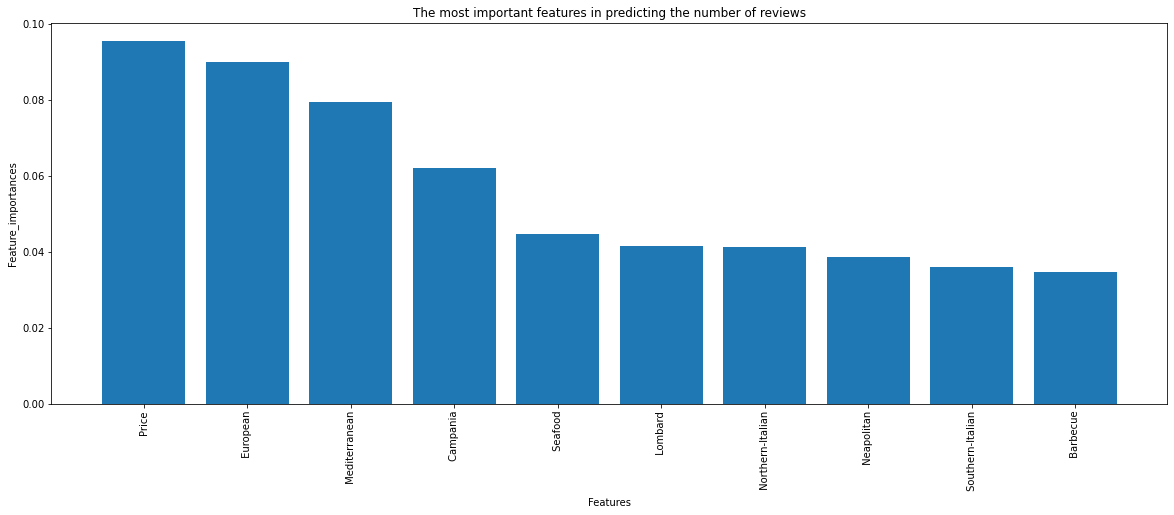

In [32]:
# Plot The most important features in predicting price
plt.figure(figsize=(20,7))
plt.bar(feature_importances_sorted_10.index,feature_importances_sorted_10)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature_importances')
plt.title('The most important features in predicting the number of reviews')
plt.show()

Trying to predict where it's best to buy a 30 m^2 commercial property to start an italian restaurant having 100000 as initial investment

In [122]:
#read data in-1
df = pd.read_csv("final.csv")

In [123]:
df = DataFrame(df, columns=['Reviews','Rating','Price','Revenue','Cuisine','NIL','lat','lng','restaurants_count','Population','Pricexm2'])

In [124]:
df['Category'] = df['Cuisine'].str.partition(',')[0]

In [125]:
# Impute categorical variables with the most frequent,
# because this method is better for replace null values of categorical variables 
imp_obj= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols]= pd.DataFrame(data=imp_obj.fit_transform(df[obj_cols]),
                                         index=df[obj_cols].index, columns=obj_cols)
df[obj_cols].isnull().sum().sum()

0

In [126]:
# Impute numeric values with mean
# because this method has better result than imputation with median
imp_num= SimpleImputer(missing_values=np.nan, strategy='mean')
num_cols = df.drop(columns=['Reviews']).select_dtypes(include=['float64', 'int64']).columns
df[num_cols]= pd.DataFrame(data=imp_num.fit_transform(df[num_cols]),
                                         index=df[num_cols].index, columns=num_cols)
df[num_cols].isnull().sum().sum()

0

In [127]:
# Deleting rows with missing outcomes
df = df.dropna()

In [128]:
# Remove unwanted characters from cuisines feature and split it to rows, then conver them into array 
cuisine = np.array(df['Cuisine'].map(lambda a: a.strip('{}').replace('"', '').split(',')))
cuisine

array([list(['Filipino', ' Healthy']),
       list(['Middle Eastern', ' Turkish', ' Pub', ' Bar', ' International', ' Dining bars']),
       list(['Italian', ' Steakhouse', ' Barbecue']), ...,
       list(['Asian', ' Nepali']),
       list(['Chinese', ' Cafe', ' Fast Food', ' Sushi', ' Middle Eastern']),
       list(['Chinese', ' Japanese', ' Sushi', ' Asian'])], dtype=object)

In [129]:
# Get all unique values from cuisine, then conver them into array
cuisine_groups = np.unique(np.concatenate(cuisine))[1:]
cuisine_groups

array([' African', ' American', ' Apulian', ' Arabic', ' Argentinean',
       ' Asian', ' Australian', ' Austrian', ' Bar', ' Barbecue',
       ' Beer restaurants', ' Beijing cuisine', ' Brazilian', ' Brew Pub',
       ' British', ' Cafe', ' Campania', ' Caribbean', ' Catalan',
       ' Central American', ' Central Asian', ' Central European',
       ' Central-Italian', ' Chinese', ' Colombian', ' Contemporary',
       ' Deli', ' Diner', ' Dining bars', ' Eastern European',
       ' Ecuadorean', ' Egyptian', ' Emilian', ' Ethiopian', ' European',
       ' Fast Food', ' Filipino', ' French', ' Fujian', ' Fusion',
       ' Gastropub', ' German', ' Greek', ' Grill', ' Hawaiian',
       ' Healthy', ' Indian', ' International', ' Israeli', ' Italian',
       ' Japanese', ' Japanese Fusion', ' Japanese sweets parlour',
       ' Korean', ' Latin', ' Lazio', ' Lebanese', ' Ligurian',
       ' Lombard', ' Mediterranean', ' Mexican', ' Middle Eastern',
       ' Moroccan', ' Neapolitan', ' Nepali

In [130]:
def convert_amenties_to_boolean(cuisine_groups, cuisine):
    
    '''
    INPUT
    amenities_groups - an array containing all unique values of amenities
    amenities - an array containing all values of amenities
    
    OUTPUT
    amenties_boolean - an array containing boolean values of amenities
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Create an empty array with all zeros
    2. substitute with 1 if value of amenities_groups is found in amenities rows and vice versa
    '''
    amenties_boolean = np.empty((cuisine.shape[0], cuisine_groups.shape[0]))
    for i, row in enumerate(cuisine):
        amns = cuisine_groups.copy()
        for j, amn in enumerate(amns):
            if amn in cuisine[i]:
                amenties_boolean[i,j] = True
            else:
                amenties_boolean[i,j] = False
    return amenties_boolean

#Use the function to convert values to 0 or 1
cuisine= convert_amenties_to_boolean(cuisine_groups, cuisine)
cuisine

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
# Reset index of the the dataframe
df = df.reset_index(drop=True)

In [132]:
# Add cuisine to the dataframe
df = pd.concat([df, pd.DataFrame(data=cuisine, columns=cuisine_groups)], axis=1)


In [133]:
# Dummy the areas
var = 'NIL'

dummies = pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=False)
# we need to remember the dummy columns of the different regions 
dummy_columns = dummies.columns

# we need to remember all the regions
unique_NIL = df[var].unique()

# we will need this table to fill up the varible that depend on NIL 
nil_vars = df.drop_duplicates(subset="NIL", keep="first").loc[:, ["NIL", "restaurants_count", "Population", "Pricexm2"]].set_index("NIL", drop=True)

# We will make hypotetical predictions on all the examples with italian cuisine
df = df.loc[df.Cuisine.eq("Italian"), :]
df.drop('Cuisine', axis=1, inplace=True)


df = pd.concat([df.drop(var, axis=1), dummies], axis=1)

In [135]:
# Change the type of columns with uint8 to float, to apply feature scaling without any future warning 
uint8_cols = df.select_dtypes(include=['uint8']).columns
df[uint8_cols]=df[uint8_cols].astype('float64')

In [136]:
df = df.dropna()

In [137]:
df.to_csv('test.csv')

In [138]:
test = df

In [139]:
# Create X variable with all features 
X= test.drop(columns=['Category','Revenue','Reviews','Rating','lat','lng'])

In [144]:
st_scaler= StandardScaler()

# where we will insert the region predictions
original = pd.DataFrame()

for nil in unique_NIL:
    nil_dummy = "NIL_" + nil
    # we reset all the NIL dummies to zero
    X[dummy_columns] = 0
    # all of the current hypotetical region are set to 1
    X[nil_dummy] = 1
    print(len(X), X[dummy_columns].sum().sum(), X[nil_dummy].sum())
    original_add = {"NIL" : nil}
    
    # restaurants_count, Population, Pricexm2 depend on the NIL
    # we have to set this values accordingly
    for c in nil_vars.columns:
        X[c] = nil_vars.loc[nil, c]
        original_add[c] = nil_vars.loc[nil, c]
    print(X)
    # Apply feature scaling to the listings data.
    X= pd.DataFrame(data=st_scaler.fit_transform(X), index=X.index, columns=X.columns)
    y_pred = forest_reg_imp.predict(X)
    
    # we add the averaged prediction
    original_add["predicted"] = np.mean(y_pred)
    original = original.append(original_add, ignore_index=True)
    
    print(f"Region {nil:.20}: {np.mean(y_pred):.2f}")

200 200 200
Region BRERA: 125.02
200 200 200
Region XXII MARZO: 125.02
200 200 200
Region FORZE ARMATE: 125.02
200 200 200
Region DUOMO: 125.02
200 200 200
Region PORTA VIGENTINA - PO: 125.02
200 200 200
Region PORTA TICINESE - CON: 125.02
200 200 200
Region PORTA GENOVA: 125.02
200 200 200
Region BUENOS AIRES - PORTA: 125.02
200 200 200
Region PORTA TICINESE - CON: 125.02
200 200 200
Region TRIULZO SUPERIORE: 125.02
200 200 200
Region DE ANGELI - MONTE RO: 125.02
200 200 200
Region STAZIONE CENTRALE - : 125.02
200 200 200
Region SARPI: 125.02
200 200 200
Region ISOLA: 125.02
200 200 200
Region TALIEDO - MORSENCHIO: 125.02
200 200 200
Region LORETO - CASORETTO -: 125.02
200 200 200
Region VILLAPIZZONE - CAGNO: 125.02
200 200 200
Region AFFORI: 125.02
200 200 200
Region SAN SIRO: 125.02
200 200 200
Region GIAMBELLINO: 125.02
200 200 200
Region PORTA GARIBALDI - PO: 125.02
200 200 200
Region CORSICA: 125.02
200 200 200
Region GUASTALLA: 125.02
200 200 200
Region PORTELLO: 125.02
200 200 

In [ ]:
# Create the entries for which we need a prediction
X_pred = X

In [ ]:
y_pred = forest_reg_imp.predict(X_pred)

In [ ]:
y_pred = DataFrame(y_pred)

In [ ]:
original['predicted']=y_pred

In [ ]:
price = 100000/30

In [ ]:
original=original.loc[original['Pricexm2'] < price]

In [ ]:
for c in original.columns:
    print(c)

In [ ]:
!pip install geopandas
!pip install rtree
!pip install pygeos

!sudo apt install libspatialindex-dev
!pip install --upgrade geopandas

In [ ]:
import pygeos
import rtree
import geopandas as gpd

In [ ]:
milan_areas = gpd.read_file('ds964_nil_wm.geojson')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
milan_areas.plot()

In [ ]:
merged = original.merge(milan_areas, on='NIL', how='left')

In [ ]:
from geopandas import GeoDataFrame
merged = GeoDataFrame(merged)

In [ ]:
variable = 'predicted'
vmin, vmax = 0, 1000
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [ ]:
best = merged[merged.predicted == merged.predicted.max()]

In [ ]:
print(best['NIL'])